In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.info()

Saving Exploration-Cleaned-COVID-19 Survey Student Responses.csv to Exploration-Cleaned-COVID-19 Survey Student Responses.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1115 non-null   int64  
 1   online_class_time  1115 non-null   float64
 2   class_rating       1115 non-null   object 
 3   class_medium       1115 non-null   object 
 4   self_study_time    1115 non-null   float64
 5   sleep_time         1115 non-null   float64
 6   social_media_time  1115 non-null   float64
 7   time_utilized      1115 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 69.8+ KB



Summary statistics (numeric):
               age  online_class_time  self_study_time   sleep_time  \
count  1115.000000        1115.000000      1115.000000  1115.000000   
mean     20.149776           3.306771         2.926009     7.856771   
std       5.480174           2.080345         2.142819     1.601362   
min       7.000000           0.000000         0.000000     4.000000   
25%      17.000000           2.000000         2.000000     7.000000   
50%      20.000000           3.000000         2.000000     8.000000   
75%      21.000000           5.000000         4.000000     8.750000   
max      59.000000          10.000000        18.000000    15.000000   

       social_media_time  
count        1115.000000  
mean            2.380942  
std             1.749158  
min             0.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max            10.000000  

Class rating distribution:
class_rating
Very poor    403
Average      372
Good       

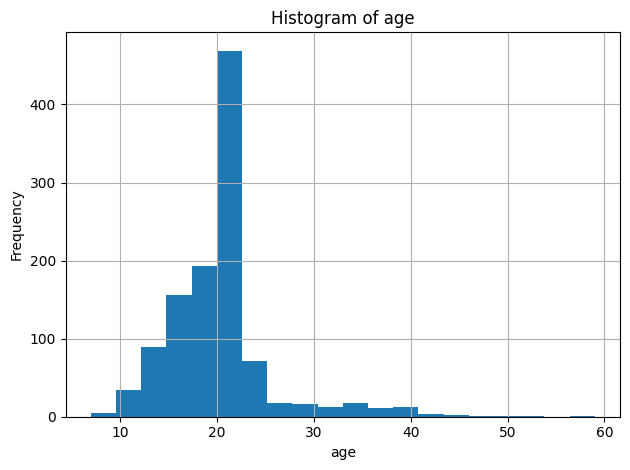

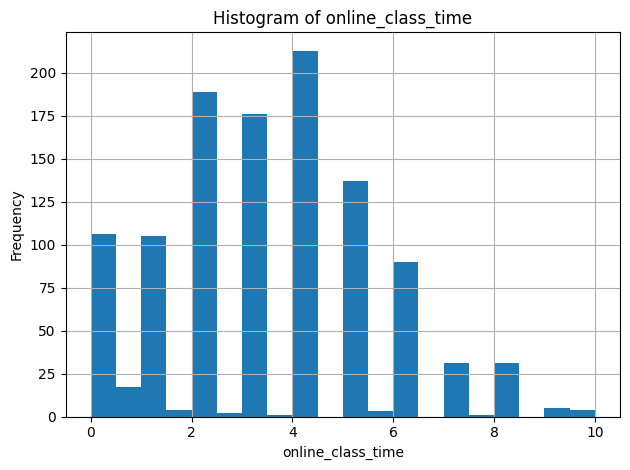

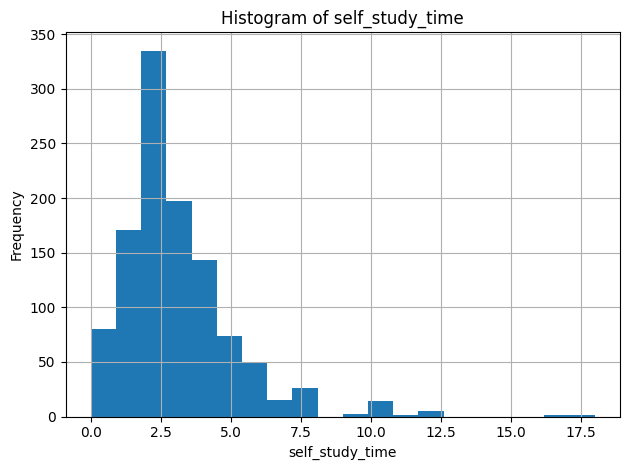

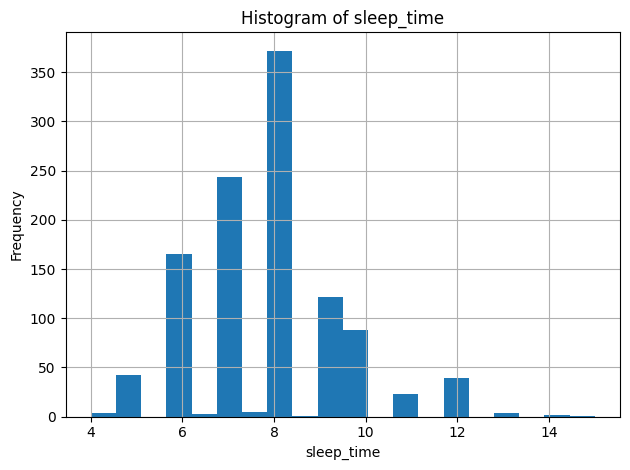

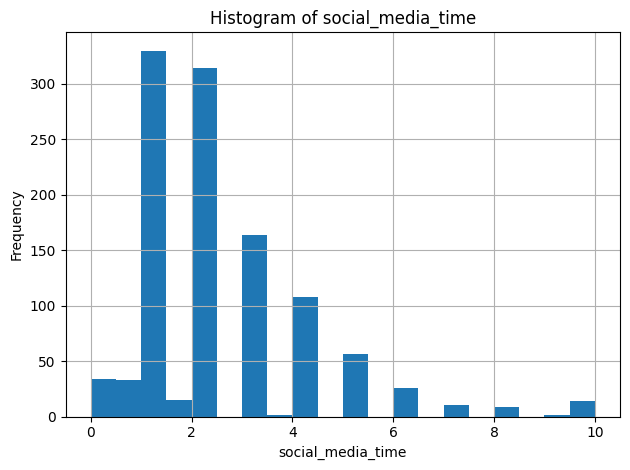

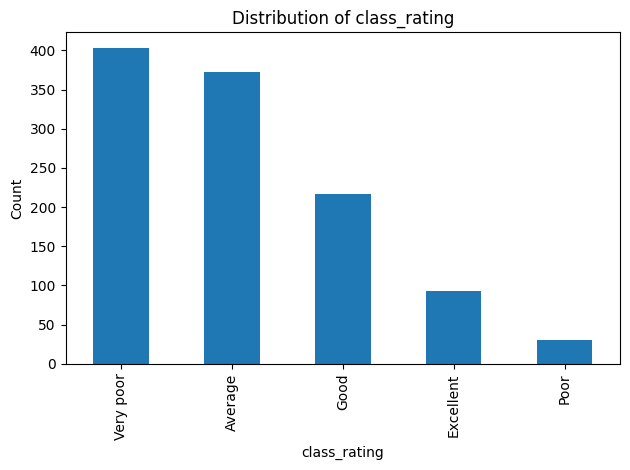

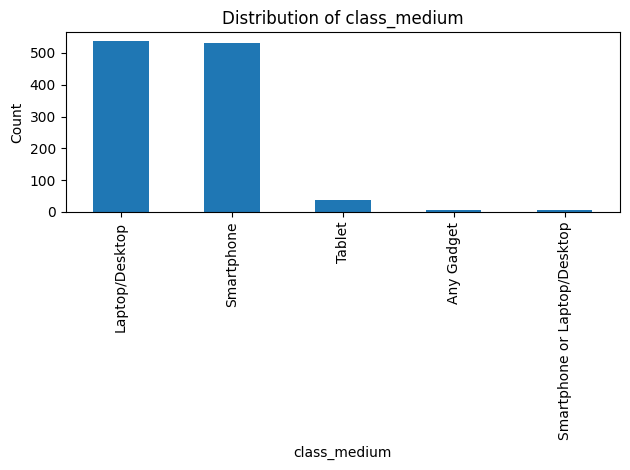

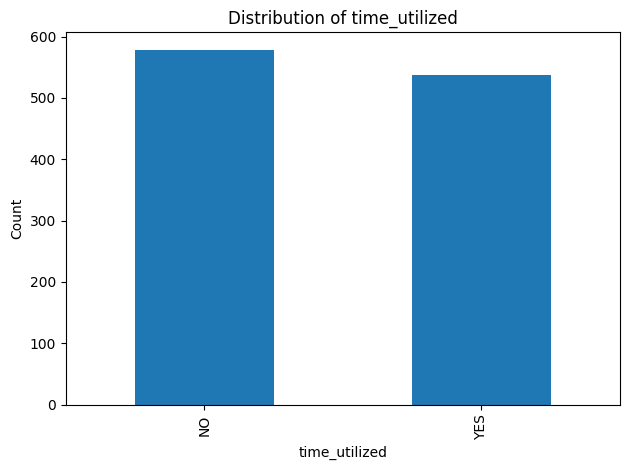


Feature columns used for modeling:
Index(['age', 'online_class_time', 'self_study_time', 'sleep_time',
       'social_media_time', 'class_rating_Excellent', 'class_rating_Good',
       'class_rating_Poor', 'class_rating_Very poor',
       'class_medium_Laptop/Desktop', 'class_medium_Smartphone',
       'class_medium_Smartphone or Laptop/Desktop', 'class_medium_Tablet'],
      dtype='object')

=== Linear Regression ===
Accuracy: 0.6149253731343284
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       175
           1       0.62      0.51      0.56       160

    accuracy                           0.61       335
   macro avg       0.62      0.61      0.61       335
weighted avg       0.62      0.61      0.61       335


=== Logistic Regression ===
Accuracy: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.62      0.71      0.67       175
           1       0.63      0.53      0.58       160


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# =========================

# =========================
# 2. Basic EDA
# =========================
print("\nSummary statistics (numeric):")
print(df.describe())

print("\nClass rating distribution:")
print(df["class_rating"].value_counts())

print("\nClass medium distribution:")
print(df["class_medium"].value_counts())

print("\nTime utilized (target) distribution:")
print(df["time_utilized"].value_counts())

# Histograms for numeric columns
numeric_cols = ["age", "online_class_time", "self_study_time",
                "sleep_time", "social_media_time"]

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Bar plots for key categoricals
for col in ["class_rating", "class_medium", "time_utilized"]:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# =========================
# 3. Prepare data for ML
#    Target: time_utilized (YES/NO)
# =========================
data = df.copy()

# Encode target as 0/1
data["time_utilized_binary"] = data["time_utilized"].map({"NO": 0, "YES": 1})

# One-hot encode remaining categoricals
X = pd.get_dummies(
    data.drop(columns=["time_utilized", "time_utilized_binary"]),
    drop_first=True
)
y = data["time_utilized_binary"]

print("\nFeature columns used for modeling:")
print(X.columns)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================
# 4. Linear Regression
# =========================
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lin_probs = lin_model.predict(X_test)
lin_preds = np.round(lin_probs).astype(int)
lin_preds = np.clip(lin_preds, 0, 1)

lin_acc = accuracy_score(y_test, lin_preds)
print("\n=== Linear Regression ===")
print("Accuracy:", lin_acc)
print(classification_report(y_test, lin_preds))

# =========================
# 5. Logistic Regression
# =========================
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
print("\n=== Logistic Regression ===")
print("Accuracy:", log_acc)
print(classification_report(y_test, log_preds))

# =========================
# 6. Random Forest Classifier
# =========================
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\n=== Random Forest ===")
print("Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))

# =========================
# 7. Summary
# =========================
print("\n=== Summary of Model Accuracies ===")
print(f"Linear Regression:   {lin_acc:.4f}")
print(f"Logistic Regression: {log_acc:.4f}")
print(f"Random Forest:       {rf_acc:.4f}")


###**General Patterns from EDA**

- Most students attended 0–4 hours of online classes daily.

- “Good” and “Excellent” class ratings were common, but many students also reported “Very poor”.

- The majority relied on smartphones, also laptops or desktops.

**On average:**

- Sleep time hovered around 6–8 hours.

- Self-study time varied widely.

- Social media time was high among many students (1–5 hours).

- These patterns show that students’ learning environments and habits during lockdown were highly varied.

###**Machine Learning Insights**

I trained three models to predict whether a student felt they used their time well:

1. Logistic Regression — Best Model (63% accuracy)

- Performs best overall.

- Predicts both YES and NO classes reliably.

- Correctly identifies about 71 percent of students who did not use their time well.

- Captures moderate relationships in data such as:

  - Higher self-study time → more likely YES

  - Higher social media usage → more likely NO

  - Better class ratings → more likely YES

2. Linear Regression (61.5% accuracy)

- Similar results to Logistic Regression.

- Good at predicting NO, weaker on YES.

- Works because the target is binary and behaves almost linearly.

3. Random Forest (61.2% accuracy)

- Slightly lower performance.

- Handles mixed features but does not outperform logistic regression.

- Predicts both classes moderately well but offers no major advantages over linear models.

###**Key Insights About Student Behavior**
- 1. Time Utilization is Predictable — but only to a moderate degree

  - The highest model accuracy is 63%, meaning:

      - Many factors influence students’ perceived productivity.

      - No single behavior (class time, self-study, sleep) fully determines whether students used their time well.
  

- 2. Study Time, Class Rating, and Social Media Use Matter Most

  - From model behavior and encoded feature importance:

     - Higher self-study time → more likely to say YES

     - Better class experience (Excellent/Good) → more likely YES

     - Higher social media time → more likely NO

     - These align with typical academic patterns.

- 3. Device Type Has Limited Predictive Power

  - Whether students used:

      - smartphones

      -  laptops

      - desktops

It had minimal influence on their time utilization, suggesting students adapted regardless of device.

- 4. Students who did NOT use their time well (NO) were easier for models to identify

  - All three models had higher recall for the NO group, implying:

  - There are clearer behavioral patterns associated with poor time utilization.

  - The YES group is more mixed and harder to classify.